# IRIS flower Dataset 

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd
#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
#Machine learning Utilities 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

from sklearn.neighbors import KNeighborsClassifier as Kn
 

In [2]:
df=pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Data Analysis (EDA)

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.shape

(150, 5)

Text(0.5, 1.0, 'species length against sepal width')

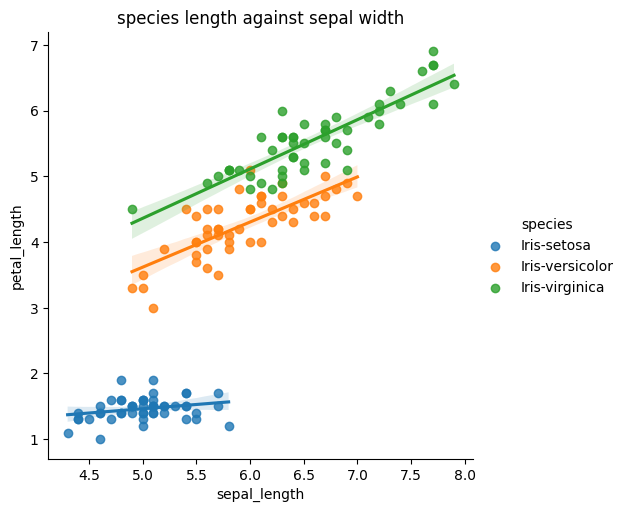

In [7]:
sns.lmplot(data=df,x="sepal_length",y="petal_length",hue="species")
plt.title("species length against sepal width")

Text(0.5, 1.0, 'species petal_width against petal width')

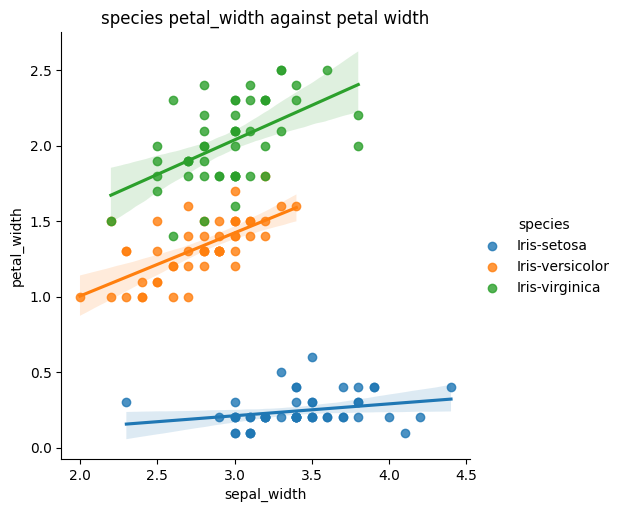

In [8]:
sns.lmplot(data=df,x="sepal_width",y="petal_width",hue="species")
plt.title("species petal_width against petal width")

In [9]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: ylabel='count'>

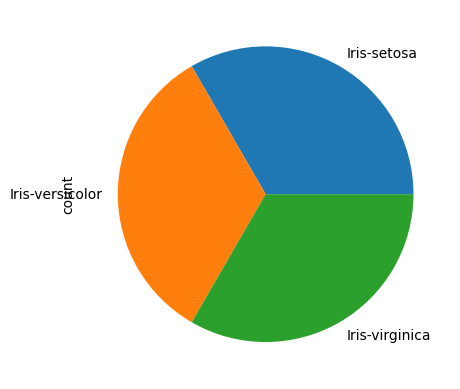

In [11]:
df.species.value_counts().plot(kind="pie")

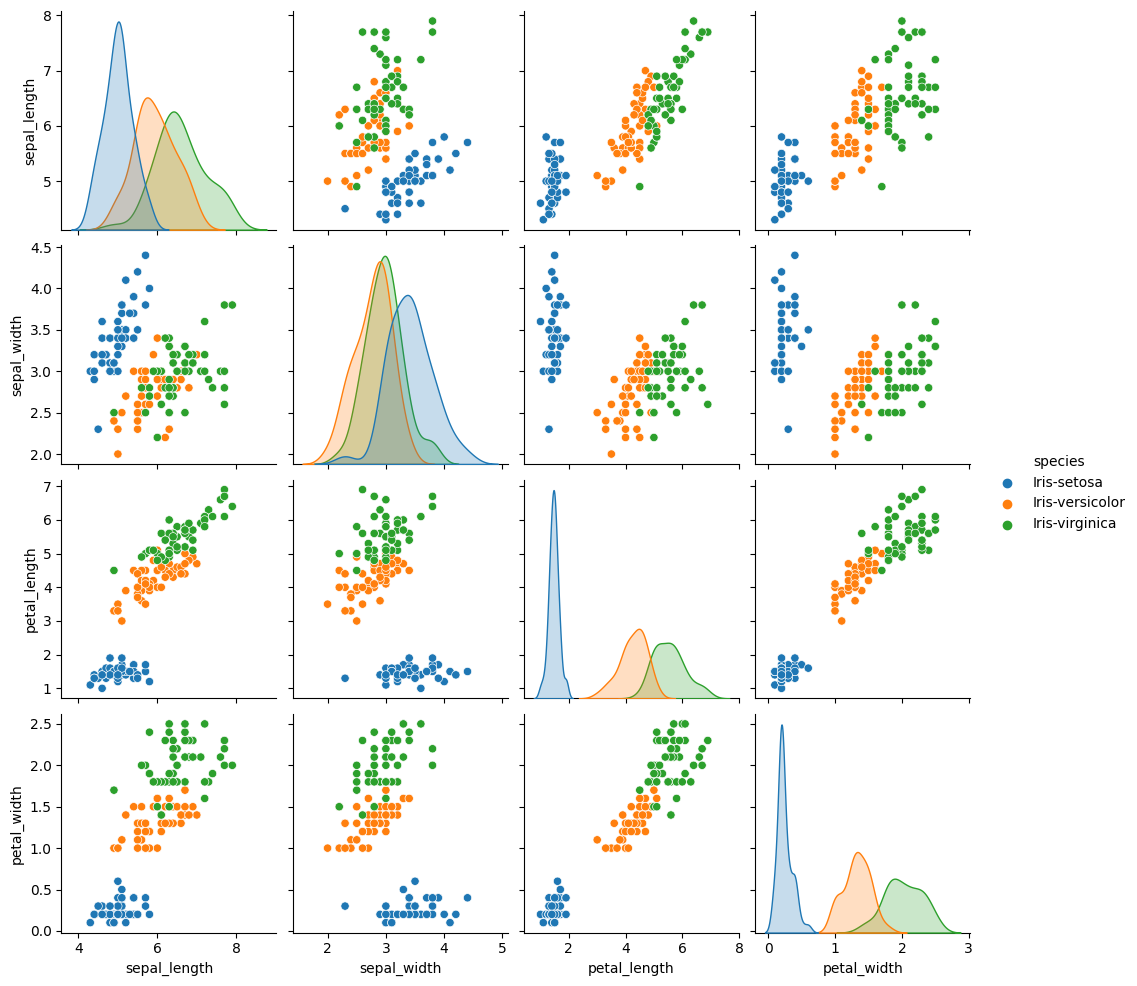

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.pairplot(df, hue="species")  # Corrected syntax

# Show the plot
plt.show()

In [13]:
x=df.drop(columns="species")
y=df["species"]
#split the dataset
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=2)

In [14]:
knn=Kn(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [15]:
ypred=knn.predict(xtest)

In [16]:
print("Accuracy:",accuracy_score(ytest,ypred))

Accuracy: 1.0


In [17]:
print("Classification Report:\n",classification_report(ytest,ypred))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

